# Unit 5 - Financial Planning

In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
from alpaca_trade_api.rest import REST, TimeFrame
from MCForecastTools import MCSimulation

%matplotlib inline

In [11]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [12]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [13]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [14]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_response = requests.get(btc_url)
btc_price = btc_response.json()["data"]["1"]["quotes"]["CAD"]["price"]
# Fetch current ETH price
# YOUR CODE HERE!
eth_response = requests.get(eth_url)
eth_price = eth_response.json()["data"]["1027"]["quotes"]["CAD"]["price"]
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


The current value of your 1.2 BTC is $63884.13
The current value of your 5.3 ETH is $19977.37


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [15]:
# Set current amount of shares
my_agg = 200
my_spy = 50


In [16]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
api = REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [17]:
# Format current date as ISO format
# YOUR CODE HERE!
start_date = pd.Timestamp("2022-02-17", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-03-17", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

df_portfolio = api.get_bars(tickers, TimeFrame.Day, start_date, end_date).df

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio.head(60)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-02-17 05:00:00+00:00,109.560,109.8050,109.5146,109.64,9807695,25959,109.652013,AGG
2022-02-18 05:00:00+00:00,109.830,109.8800,109.7100,109.87,6896731,20755,109.811675,AGG
2022-02-22 05:00:00+00:00,109.680,109.7800,109.5650,109.75,6925944,21241,109.684022,AGG
2022-02-23 05:00:00+00:00,109.525,109.5500,109.2300,109.26,10990618,24439,109.388778,AGG
2022-02-24 05:00:00+00:00,109.670,109.7681,109.1700,109.46,12371968,36217,109.528219,AGG
2022-02-25 05:00:00+00:00,109.460,109.5800,109.3300,109.57,9239738,27164,109.450914,AGG
2022-02-28 05:00:00+00:00,110.040,110.4300,110.0200,110.36,15026077,34673,110.285559,AGG
2022-03-01 05:00:00+00:00,110.600,111.1700,110.5700,110.82,14248500,39215,110.836369,AGG
2022-03-02 05:00:00+00:00,110.310,110.3800,109.4600,109.49,8489288,27605,109.930996,AGG


In [18]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
close_prices = df_portfolio["2022-03-17 04:00:00+00:00"]
agg_close_price = close_prices.iloc[0]['close']
spy_close_price = close_prices.iloc[1]['close']
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $107.86
Current SPY closing price: $441.07


C:\Users\gunin\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22053.50
The current value of your 200 AGG shares is $21572.00


### Savings Health Analysis

In [20]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
df_savings = pd.DataFrame(
    {'amount':[my_btc_value + my_eth_value,my_spy_value + my_agg_value]}, 
    index=['crypto', 'shares'])
# Create savings DataFrame
# YOUR CODE HERE!

# Display savings DataFrame
display(df_savings)

,amount
crypto,83861.496708
shares,43625.500000


<AxesSubplot:ylabel='amount'>

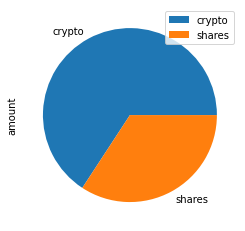

In [21]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='amount')

In [22]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
current_savings = df_savings.sum()[0]
# Calculate total amount of savings
# YOUR CODE HERE!
if current_savings > emergency_fund:
    print("Congratulations, you have enough money in this fund")
elif current_savings == emergency_fund:
    print("Congratulations, you have reached your financial goal")
else:
    print(f"You are ${emergency_fund-current_savings:0.2f} from your goal")
# Validate saving health
# YOUR CODE HERE!


Congratulations, you have enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [23]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [24]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_stock_data = api.get_bars(['AGG', 'SPY'], TimeFrame.Day, start_date, end_date).df

# Display sample data
df_stock_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.605,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.810,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.860,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.140,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.970,2718710,12697,111.031967,AGG


In [25]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
def format_MCSimulation(df_ticker):
    ticker_list = df_ticker['symbol'].unique()
    df_ = pd.DataFrame()
    for ticker in ticker_list:
        df_ticker_reformatted = df_ticker[df_ticker['symbol'] == ticker]
        df_ticker_reformatted.columns = pd.MultiIndex.from_product([[ticker],df_ticker.columns])
        if df_.empty:
            df_ = df_ticker_reformatted
        else:
            df_ = pd.concat([df_,
                            df_ticker_reformatted],
                            axis = 1,
                            join='inner')

    return df_

df_stock_data_reformatted = format_MCSimulation(df_stock_data)
df_stock_data_reformatted.head(-5)

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   
...                           ...       ...       ...      ...      ...   
2021-04-19 04:00:00+00:00  114.39  114.5000  114.0000  114.450  4795013   
2021-04-20 04:00:00+00:00  114.40  114.6700  114.3900  114.630  4122422   
2021-04-21 04:00:00+00:00  114.61  114.7400  114.5300  114.740  5254501   
2021-04-22 04:00:00+00:00  114.74  114.8000  114.5900  114.770  4570468   
2021-04-23 04:00:00+00:00  114.80  115.0860  114.6415  114.750  3813862   

                                                             SPY            \
                          trade_count        vwap symbol    open      high   
timestamp                                                                    
2016-05-02 04:00:00+00:00       15119  110.627199    AGG  206.90  208.1800   
2016-05-03 04:00:00+00:00       15662  110.865995    AGG  206.53  206.8000   
2016-05-04 04:00:00+00:00       13982  110.879063    AGG  204.96  205.8500   
2016-05-05 04:00:00+00:00       15707  111.028363    AGG  205.57  205.9800   
2016-05-06 04:00:00+00:00       12697  111.031967    AGG  204.08  205.7700   
...                               ...         ...    ...     ...       ...   
2021-04-19 04:00:00+00:00       21986  114.429381    AGG  416.27  416.7400   
2021-04-20 04:00:00+00:00       16333  114.600160    AGG  413.97  415.0859   
2021-04-21 04:00:00+00:00       25027  114.631637    AGG  411.43  416.2900   
2021-04-22 04:00:00+00:00       13067  114.740034    AGG  415.83  416.7800   
2021-04-23 04:00:00+00:00       11265  114.743341    AGG  412.96  418.2500   

                                                                    \
                              low     close     volume trade_count   
timestamp                                                            
2016-05-02 04:00:00+00:00  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  203.88  205.7200   89131004      340335   
...                           ...       ...        ...         ...   
2021-04-19 04:00:00+00:00  413.79  415.2100   75527000      450182   
2021-04-20 04:00:00+00:00  410.59  412.1700   79104051      476871   
2021-04-21 04:00:00+00:00  411.36  416.0700   64672721      359135   
2021-04-22 04:00:00+00:00  411.13  412.2700   97276832      587727   
2021-04-23 04:00:00+00:00  412.79  416.7400   73241320      362355   

                                              
                                 vwap symbol  
timestamp                                     
2016-05-02 04:00:00+00:00  207.294812    SPY  
2016-05-03 04:00:00+00:00  206.312060    SPY  
2016-05-04 04:00:00+00:00  205.090172    SPY  
2016-05-05 04:00:00+00:00  205.141555    SPY  
2016-05-06 04:00:00+00:00  204.937074    SPY  
...                               ...    ...  
2021-04-19 04:00:00+00:00  415.352416    SPY  
2021-04-20 04:00:00+00:00  412.677447    SPY  
2021-04-21 04:00:00+00:00  414.531238    SPY  
2021-04-22 04:00:00+00:00  413.942573    SPY  
2021-04-23 04:00:00+00:00  415.667363    SPY  

[1254 rows x 16 columns]

In [149]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data_reformatted,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [153]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\gunin\Documents\github_repos\Unit-5---Financial-Planning-Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000128,0.993129,0.998175,1.000152,1.002770,1.008257,0.997277,0.997710,0.999321,0.992475,...,0.997454,1.016613,1.003963,0.997677,1.008560,1.000742,1.007110,1.012913,1.000032,1.017885
2,1.010369,0.992334,0.990940,1.013303,1.012977,1.009078,0.993122,0.998487,0.993979,0.993782,...,1.003762,1.020827,1.007025,0.999319,1.009828,1.009138,1.012337,1.018567,1.000442,1.031923
3,1.004470,1.001384,0.992456,1.017308,1.009840,1.013749,0.983766,1.001577,0.990509,0.993882,...,1.000501,1.026085,1.006794,1.008113,1.022549,1.007644,1.013751,1.020711,0.984207,1.038732
4,1.006916,1.003525,1.005094,1.004377,1.017339,1.014136,0.973763,1.001017,0.983284,0.994557,...,0.997292,1.020253,1.010878,1.006669,1.039585,1.001708,1.012518,1.018105,0.983639,1.027201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.850561,9.195479,20.053854,9.641138,22.835773,41.557220,15.074838,13.178790,26.380484,33.434983,...,9.828856,7.802558,15.746771,27.508408,28.064640,15.090757,14.817275,41.766642,21.329581,14.106736
7557,6.891825,9.240776,20.246528,9.633230,22.483282,41.185912,15.092895,13.211090,26.569639,33.651956,...,9.806721,7.838506,15.652082,27.645894,28.167916,14.991736,14.659408,41.959625,21.289899,14.074409
7558,6.838029,9.247649,20.345419,9.749226,22.303103,40.924682,14.877586,13.310177,26.917243,33.556282,...,9.717571,7.873254,15.562704,27.485231,27.838670,14.944216,14.604441,41.889688,21.327216,14.156440
7559,6.856380,9.289627,20.271917,9.810315,22.477440,41.029051,14.838215,13.415919,27.050265,33.556792,...,9.770935,7.795370,15.619868,27.593883,28.187244,14.954200,14.828333,41.481765,21.392080,14.159019


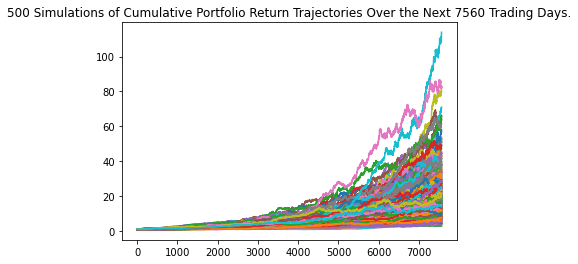

In [154]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirtyyear.plot_simulation()


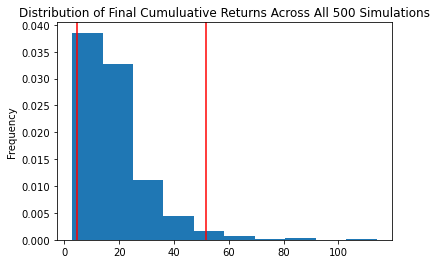

In [155]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [156]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirtyyear.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean             18.615721
std              12.678537
min               2.851060
25%              10.222789
50%              15.565966
75%              23.211717
max             113.947704
95% CI Lower      4.512646
95% CI Upper     51.599041
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [157]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $90252.92 and $1031980.82


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [158]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $135379.38 and $1547971.23


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data_reformatted,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\gunin\Documents\github_repos\Unit-5---Financial-Planning-Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993157,1.001913,1.000721,1.000490,1.000317,1.006371,1.011511,0.984635,0.997496,0.999422,...,0.999209,1.006460,0.984965,1.007940,0.999831,1.005332,0.990888,1.000528,1.003599,0.999220
2,0.988149,0.999034,1.003304,0.997679,0.990278,1.004464,1.012944,0.975332,0.996691,0.998909,...,0.995101,1.004360,0.987771,1.008780,0.999975,0.996715,0.990956,0.996493,1.006404,0.990431
3,0.991078,1.001615,1.004054,0.992276,0.986150,1.007537,1.011557,0.983158,0.989845,0.998814,...,1.000501,1.000651,0.985231,1.018583,0.997459,1.002873,0.997362,0.996609,1.000033,0.992728
4,0.991949,0.999056,1.007978,0.985806,0.994263,1.007474,1.012286,0.976316,0.991811,0.998046,...,0.980195,1.007859,0.978397,1.028852,1.014970,1.005429,1.003249,0.998159,0.998055,1.000748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.613137,1.641390,1.676207,1.242967,1.332604,1.640678,0.984956,1.262075,1.630116,0.959776,...,1.264706,2.073325,1.623862,1.552380,2.300856,1.191736,1.584606,1.593053,1.827780,1.071530
1257,2.637826,1.630545,1.662398,1.234581,1.328785,1.655209,0.985598,1.267647,1.629059,0.960879,...,1.265413,2.077366,1.631164,1.559009,2.293742,1.179464,1.564795,1.586773,1.815117,1.072004
1258,2.644429,1.612708,1.685683,1.235397,1.335356,1.654096,0.988022,1.256148,1.624889,0.968409,...,1.271343,2.072446,1.628595,1.565272,2.286617,1.188345,1.565473,1.591541,1.825313,1.066971
1259,2.626306,1.638421,1.673837,1.222919,1.328768,1.664559,0.994470,1.249342,1.615784,0.973897,...,1.279887,2.068161,1.634354,1.557268,2.264858,1.194217,1.568010,1.593623,1.843556,1.068565


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

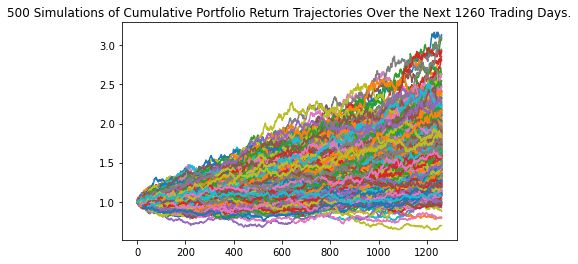

In [28]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_fiveyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

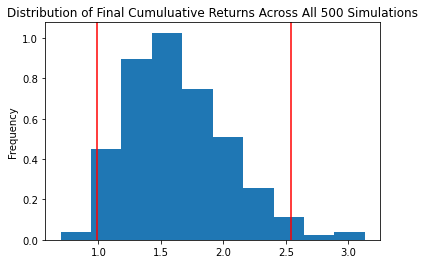

In [29]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_fiveyear.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
table = MC_fiveyear.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(table)

count           500.000000
mean              1.631326
std               0.410312
min               0.696817
25%               1.326126
50%               1.590420
75%               1.878622
max               3.133460
95% CI Lower      0.991450
95% CI Upper      2.544210
Name: 1260, dtype: float64


In [33]:
# Set initial investment
# YOUR CODE HERE!
init_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(table[8]*init_investment,2)
ci_upper_five = round(table[9]*init_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${init_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $19829.0 and $50884.19


### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


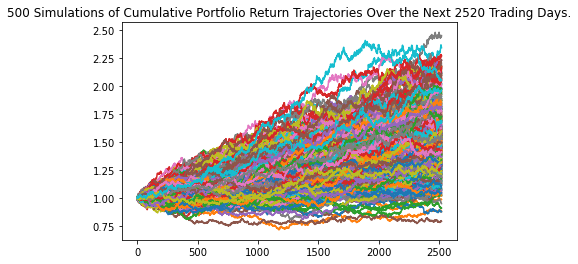

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

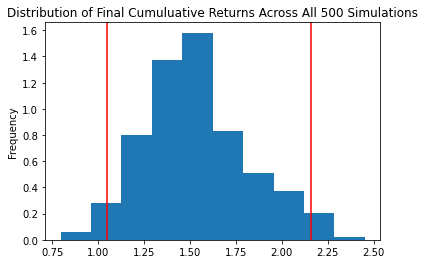

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
